In [25]:
#PARA CREAR LA COLUMNA PATH

import glob
import pandas as pd

path_train = "train/**/**.jpg"

def make_imag_df(path):
    dictionary = {}
    for paths in glob.glob(path):
        dictionary.setdefault('path', []).append(paths.split('\\')[-3])
        dictionary.setdefault('label', []).append(paths.split('\\')[-2])
        dictionary.setdefault('id', []).append(paths.split('\\')[-1][:-4])
        dictionary.setdefault('img', []).append(paths.split('\\')[-1])
    images = pd.DataFrame(dictionary)
    return images

make_imag_df(path_train)

,path,label,id,img
0,train,happy,00007,00007.jpg
1,train,happy,00014,00014.jpg
2,train,happy,00030,00030.jpg
3,train,happy,00034,00034.jpg
4,train,happy,00046,00046.jpg
...,...,...,...,...
6171,train,sadness,28674,28674.jpg
6172,train,sadness,28678,28678.jpg
6173,train,sadness,28680,28680.jpg
6174,train,sadness,28683,28683.jpg


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import cv2 # opencv, librería de referencia para tratamiento de imagen

![](https://img.devrant.com/devrant/rant/r_1688469_xaXLS.jpg)

In [27]:
train_set = pd.read_csv("train_set.csv")
train_set

,label,id_img,path
0,happy,22373,happy/22373.jpg
1,happy,21433,happy/21433.jpg
2,happy,12418,happy/12418.jpg
3,happy,21278,happy/21278.jpg
4,happy,8081,happy/08081.jpg
...,...,...,...
6171,sadness,11346,sadness/11346.jpg
6172,sadness,4441,sadness/04441.jpg
6173,sadness,15236,sadness/15236.jpg
6174,sadness,27361,sadness/27361.jpg


Las imágenes están en blanco y negro, pero el método `cv2.imread` necesita que se le especifique el segundo argumento como 0 ya que por defecto leerá en color. 

`flag: It specifies the way in which image should be read. It’s default value is cv2.IMREAD_COLOR`
[para más info...](https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/)


In [28]:
drama = cv2.imread("train/happy/00007.jpg", 0) 
drama.shape

(48, 48)

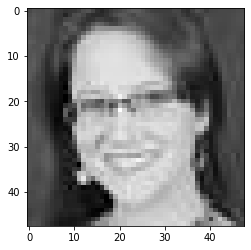

In [29]:
plt.imshow(drama, cmap = 'gray')

In [30]:
drama.shape

(48, 48)

##### Ten en cuenta que las imágenes no están mezcladas, están primero las fotos felices y luego todas las fotos tristes.

In [31]:
train_set[train_set.label == "happy"].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284],
           dtype='int64', length=3285)

In [32]:
train_set[train_set.label == "sadness"].index

Int64Index([3285, 3286, 3287, 3288, 3289, 3290, 3291, 3292, 3293, 3294,
            ...
            6166, 6167, 6168, 6169, 6170, 6171, 6172, 6173, 6174, 6175],
           dtype='int64', length=2891)

Accedemos a las imágenes directamente en sus carpetas, puedes usar librerías como `glob` o nuestro ya viejo conocido, `os`.
Para cargar y mostrar las imágenes `imageio` o como ya hemos visto `cv2`.

**Disclaimer** Para gestionar imágenes no es necesario cargar los arrays en nuestro jupyter. 

https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/

In [33]:
# NaN = np.nan
# train_set["leer_imagen"] = NaN

# for i in train_set.path:
#     train_set["leer_imagen"] = cv2.imread("train/" + i, 0)

In [34]:
train_set.path[0]

'happy/22373.jpg'

In [35]:
lista = []
for i in train_set.path:
    x = "train/" + i
    lista.append(cv2.imread(x, 0))
train_set["leer_imagen"] = lista

In [36]:
train_set

,label,id_img,path,leer_imagen
0,happy,22373,happy/22373.jpg,"[[25, 44, 56, 68, 88, 98, 93, 92, 105, 120, 13..."
1,happy,21433,happy/21433.jpg,"[[33, 29, 22, 18, 19, 23, 22, 19, 20, 23, 14, ..."
2,happy,12418,happy/12418.jpg,"[[35, 43, 66, 84, 71, 41, 36, 53, 97, 56, 100,..."
3,happy,21278,happy/21278.jpg,"[[118, 124, 132, 126, 127, 139, 67, 38, 33, 29..."
4,happy,8081,happy/08081.jpg,"[[201, 209, 193, 107, 106, 107, 98, 114, 144, ..."
...,...,...,...,...
6171,sadness,11346,sadness/11346.jpg,"[[167, 180, 196, 171, 101, 50, 52, 70, 55, 49,..."
6172,sadness,4441,sadness/04441.jpg,"[[163, 154, 128, 116, 121, 106, 90, 99, 115, 1..."
6173,sadness,15236,sadness/15236.jpg,"[[109, 25, 29, 33, 55, 65, 82, 87, 147, 179, 1..."
6174,sadness,27361,sadness/27361.jpg,"[[62, 64, 67, 52, 57, 65, 50, 55, 117, 179, 15..."


In [15]:
class_names = ['sadness', 'happy']

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_set.leer_imagen[i], cmap='gray')
    plt.xlabel(class_names[train_set.label[i]])
plt.show()

AttributeError: 'DataFrame' object has no attribute 'leer_imagen'

In [38]:
train_set["label"] = train_set["label"].apply(lambda x: 1 if x == "happy" else 0)

In [68]:
train_set["label"].nunique()

1

In [39]:
train_set

,label,id_img,path,leer_imagen
0,0,22373,happy/22373.jpg,"[[25, 44, 56, 68, 88, 98, 93, 92, 105, 120, 13..."
1,0,21433,happy/21433.jpg,"[[33, 29, 22, 18, 19, 23, 22, 19, 20, 23, 14, ..."
2,0,12418,happy/12418.jpg,"[[35, 43, 66, 84, 71, 41, 36, 53, 97, 56, 100,..."
3,0,21278,happy/21278.jpg,"[[118, 124, 132, 126, 127, 139, 67, 38, 33, 29..."
4,0,8081,happy/08081.jpg,"[[201, 209, 193, 107, 106, 107, 98, 114, 144, ..."
...,...,...,...,...
6171,0,11346,sadness/11346.jpg,"[[167, 180, 196, 171, 101, 50, 52, 70, 55, 49,..."
6172,0,4441,sadness/04441.jpg,"[[163, 154, 128, 116, 121, 106, 90, 99, 115, 1..."
6173,0,15236,sadness/15236.jpg,"[[109, 25, 29, 33, 55, 65, 82, 87, 147, 179, 1..."
6174,0,27361,sadness/27361.jpg,"[[62, 64, 67, 52, 57, 65, 50, 55, 117, 179, 15..."


In [40]:
# Ajustamos las X y las y para pasarlas a Tensor
X = np.stack(train_set.leer_imagen)
y = np.stack(train_set.label)

In [41]:
lista_random_state = []
lista_accuracy = []
lista_epochs = []

In [42]:
from sklearn.model_selection import train_test_split 
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [43]:
from sklearn.model_selection import train_test_split 
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Variable para meter en un dataframe
rdm_state = np.random

# Ajustamos las X y las y para pasarlas a Tensor
X = np.stack(train_set.leer_imagen)
y = np.stack(train_set.label)

# Dividimos entre train y test
for i in range(80,101):
    train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=i)
    print("----------------------------------------------------------------------------------------------------------------")
    print("ramdom state is:", i)
    print("----------------------------------------------------------------------------------------------------------------")
    # Hacemos reshape y normalizamos
    train_images = train_images.reshape(train_images.shape[0],48,48,1)
    train_images = train_images / 255

    test_images = test_images.reshape(test_images.shape[0],48,48,1)
    test_images = test_images / 255

    # Creamos el modelo
    model = models.Sequential()
    model.add(layers.Conv2D(filters=8, #ESTO SON NEURONAS??
                            kernel_size=(2),
                            input_shape=(48, 48, 1),
                            padding='same'))
    model.add(layers.MaxPooling2D()) # Maxpool quedando las imagenes a la mitad (en dimesiones)
    model.add(layers.Dropout(0.25))
    model.add(layers.Flatten())
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation="softmax"))

    # Compilamos el modelo - añadimos otros parametros para su correcto funcionamiento/medición
    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

    for j in range(1,7):
        # Entrenamos el modelo con 10 epochs - ¿¿¿¿EPOCHS????
        model.fit(train_images, train_labels, epochs=j)
        print("#################################################")
        print("Epoch is:", j)
        print("#################################################")

        # Hacemos una medición del modelo - ¿¿¿¿VERBOSE????
        test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

        print('\nTest accuracy:', test_acc)

        # Añadimos accuracy y random state a dataframe
        lista_accuracy.append(test_acc*100)
        lista_random_state.append(i)
        lista_epochs.append(j)

        

----------------------------------------------------------------------------------------------------------------
ramdom state is: 80
----------------------------------------------------------------------------------------------------------------
155/155 [==============================] - 3s 11ms/step - loss: 0.0460 - accuracy: 0.0000e+00
#################################################
Epoch is: 1
#################################################
39/39 - 0s - loss: 2.0010e-04 - accuracy: 0.0000e+00

Test accuracy: 0.0
Epoch 1/2
155/155 [==============================] - 2s 11ms/step - loss: 6.5711e-05 - accuracy: 0.0000e+00
Epoch 2/2
155/155 [==============================] - 2s 12ms/step - loss: 3.7322e-05 - accuracy: 0.0000e+00
#################################################
Epoch is: 2
#################################################
39/39 - 0s - loss: 7.3465e-05 - accuracy: 0.0000e+00

Test accuracy: 0.0
Epoch 1/3
155/155 [==============================] - 2s 10ms/step - loss: 

KeyboardInterrupt: 

In [31]:
submission = pd.DataFrame({"random": lista_random_state, "epoch": lista_epochs, "accuracy": lista_accuracy, "epoch": lista_epochs})
submission.sort_values("accuracy", ascending=False)
# random 44 epoch 5

,random,epoch,accuracy
269,44,6,56.067961
268,44,5,56.067961
267,44,4,56.067961
266,44,3,56.067961
265,44,2,56.067961
...,...,...,...
204,34,1,50.080907
206,34,3,50.080907
207,34,4,50.080907
208,34,5,50.080907


In [22]:
# train_images = train_images.reshape(1, -1)
#train_images = tf.expand_dims(train_images, axis=-1)
#test_images = tf.expand_dims(test_images, axis=-1)

# train_images = np.expand_dims(train_images, axis = 0)
# test_images = np.expand_dims(test_images, axis = 0)

# MODELO DEFINITIVO



In [45]:
train_set = train_set.sample(frac=1)

In [46]:
# Ajustamos las X y las y para pasarlas a Tensor
X = np.stack(train_set.leer_imagen)
y = np.stack(train_set.label)

In [47]:
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=i)

In [48]:
X = X.reshape(X.shape[0],48,48,1)
X = X / 255

In [49]:
# Hacemos reshape y normalizamos
train_images = train_images.reshape(train_images.shape[0],48,48,1)
train_images = train_images / 255

test_images = test_images.reshape(test_images.shape[0],48,48,1)
test_images = test_images / 255

In [50]:
model = models.Sequential()
model.add(layers.Conv2D(filters=8, #ESTO SON NEURONAS??
                        kernel_size=(2),
                        input_shape=(48, 48, 1),
                        padding='same'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(filters=8, #ESTO SON NEURONAS??
                        kernel_size=(2),
                        input_shape=(48, 48, 1),
                        padding='same'))
model.add(layers.MaxPooling2D()) # Maxpool quedando las imagenes a la mitad (en dimesiones)
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='sigmoid'))
model.add(layers.Dense(1, activation="softmax"))

In [51]:
# Compilamos el modelo - añadimos otros parametros para su correcto funcionamiento/medición
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [52]:
# Entrenamos el modelo con 10 epochs - ¿¿¿¿EPOCHS????
model.fit(train_images, train_labels, epochs=6)

Epoch 1/6
155/155 [==============================] - 3s 14ms/step - loss: 0.2374 - accuracy: 0.0000e+00
Epoch 2/6
155/155 [==============================] - 2s 12ms/step - loss: 0.0298 - accuracy: 0.0000e+00
Epoch 3/6
155/155 [==============================] - 2s 14ms/step - loss: 0.0154 - accuracy: 0.0000e+00
Epoch 4/6
155/155 [==============================] - 2s 16ms/step - loss: 0.0095 - accuracy: 0.0000e+00
Epoch 5/6
155/155 [==============================] - 3s 17ms/step - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 6/6
155/155 [==============================] - 3s 16ms/step - loss: 0.0047 - accuracy: 0.0000e+00


In [53]:
# Hacemos una medición del modelo - ¿¿¿¿VERBOSE????
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

39/39 - 1s - loss: 0.0039 - accuracy: 0.0000e+00

Test accuracy: 0.0


### Predecimos el modelo

In [54]:
to_pred = pd.read_csv("test_set.csv")
to_pred.head()

,id_img,path
0,18341,test/18341.jpg
1,13176,test/13176.jpg
2,23945,test/23945.jpg
3,15968,test/15968.jpg
4,18382,test/18382.jpg


In [55]:
lista = []
for i in to_pred.path:
    x = i
    lista.append(cv2.imread(x, 0))
to_pred["leer_imagen"] = lista

In [56]:
y_test = np.stack(to_pred.leer_imagen)

In [58]:
y_test = y_test.reshape(y_test.shape[0],48,48,1)
y_test = y_test / 255

In [59]:
predictions_submit = model.predict(y_test)
predictions_submit

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [60]:
predictions_submit = list(predictions_submit)

In [61]:
predictions_submit = pd.DataFrame(predictions_submit)
predictions_submit

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
4112,1.0
4113,1.0
4114,1.0
4115,1.0


In [62]:
predictions_submit.nunique()

0    1
dtype: int64

In [63]:
submission = pd.DataFrame({"id_img": to_pred["id_img"], "label": predictions_submit[0]})
submission

,id_img,label
0,18341,1.0
1,13176,1.0
2,23945,1.0
3,15968,1.0
4,18382,1.0
...,...,...
4112,8966,1.0
4113,12111,1.0
4114,16629,1.0
4115,24322,1.0


In [64]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id_img  4117 non-null   int64  
 1   label   4117 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 64.5 KB


In [65]:
submission["label"] = submission["label"].astype(float)
submission["label"] = submission["label"].apply(lambda x: "happy" if x == 1.0 else "sadness")
submission

,id_img,label
0,18341,happy
1,13176,happy
2,23945,happy
3,15968,happy
4,18382,happy
...,...,...
4112,8966,happy
4113,12111,happy
4114,16629,happy
4115,24322,happy


In [66]:
sample = pd.read_csv("sample_submission.csv")

In [67]:
all_ok_to_submit = False
if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id_img.all() == sample.id_img.all():
            submission.to_csv("output/to_submit.csv", index = False)
            all_ok_to_submit = True
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!

if all_ok_to_submit:
    print("you're ready to submit! :)")
else: 
    print("Sorry...There was an error :(")

you're ready to submit! :)
